In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
members = pd.read_csv('/content/drive/My Drive/datasets/music recommendation system/members.csv')
songs_extra_info = pd.read_csv('/content/drive/My Drive/datasets/music recommendation system/song_extra_info.csv')
songs = pd.read_csv('/content/drive/My Drive/datasets/music recommendation system/songs.csv')
#test = pd.read_csv('/content/drive/My Drive/datasets/music recommendation system/test.csv')
#train = pd.read_csv('/content/drive/My Drive/datasets/music recommendation system/train.csv')

Rough work

In [0]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [0]:
songs_extra_info.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [0]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [0]:
test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


In [0]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [0]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [0]:
train['source'] = 'train'
test['source'] = 'test'

In [0]:
train.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target', 'source'],
      dtype='object')

In [0]:
test.columns

Index(['id', 'msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'source'],
      dtype='object')

In [0]:
dataset = pd.concat([train,test])

In [0]:
dataset.to_csv('/content/drive/My Drive/datasets/music recommendation system/mix of test and train.csv')

In [0]:
dataset.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target', 'source', 'id'],
      dtype='object')

In [0]:
dataset.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,source,id
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1.0,train,NaN
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1.0,train,NaN
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1.0,train,NaN
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1.0,train,NaN
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1.0,train,NaN


In [0]:
members.columns

Index(['msno', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'expiration_date'],
      dtype='object')

In [0]:
members.shape

(34403, 7)

In [0]:
members['city'].unique()

array([ 1, 13, 12, 15,  5,  6,  4, 11, 18, 22, 14,  8, 20,  3, 17, 10, 16,
        9, 21,  7, 19])

In [0]:
members['bd'].unique()

array([   0,   43,   28,   33,   20,   30,   29,   26,   25,   21,   22,
         16,   23,   37,   18,   19,   51,   24,   17,   45,   36,   57,
         27,   34,   32,   15,   48,   50,   54,   47,   35,   46,   31,
         14,   41,   59,    2,   40,   38,   55,   39,   73,   49,   44,
        103,   52,   70,   42,   65,   56,  101,   58,   53,   64,   63,
         76,   66,   97,    3,   72,   67,   62,   61,  105,   60,   13,
         90,   12,   68,  131,   74,   89,  931,  -38,  144,   85,  112,
         96,   11,  102,   83, 1051,   87,    7,   95,  -43,  111,   93,
          5,   78, 1030,  106,  107,   82,   10])

In [0]:
songs_extra_info.columns

Index(['song_id', 'name', 'isrc'], dtype='object')

In [0]:
songs_extra_info.shape

(2295971, 3)

In [0]:
songs.columns

Index(['song_id', 'song_length', 'genre_ids', 'artist_name', 'composer',
       'lyricist', 'language'],
      dtype='object')

In [0]:
p = songs['artist_name'].unique()
print(len(p))

222363


In [0]:
dataset = pd.read_csv('/content/drive/My Drive/datasets/music recommendation system/mix of test and train.csv')

In [0]:
dataset.head()

,Unnamed: 0,msno,song_id,source_system_tab,source_screen_name,source_type,target,source,id
0,0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1.0,train,NaN
1,1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1.0,train,NaN
2,2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1.0,train,NaN
3,3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1.0,train,NaN
4,4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1.0,train,NaN


In [0]:
dataset.drop(['Unnamed: 0'],axis = 1,inplace = True)

In [0]:
dataset.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,source,id
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1.0,train,NaN
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1.0,train,NaN
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1.0,train,NaN
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1.0,train,NaN
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1.0,train,NaN


In [0]:
dataset.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,source,id
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1.0,train,NaN
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1.0,train,NaN
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1.0,train,NaN
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1.0,train,NaN
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1.0,train,NaN


In [0]:
members.columns

Index(['msno', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'expiration_date'],
      dtype='object')

In [0]:
member = members
members.drop(['registered_via','registration_init_time', 'expiration_date'],axis = 1,inplace = True)

In [0]:
members = pd.read_csv('/content/drive/My Drive/datasets/music recommendation system/members.csv')


In [0]:
member.head()

,msno,city,bd,gender
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN


In [0]:
dataset = pd.merge(dataset,member,on = 'msno')

In [0]:
dataset.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,source,id,city,bd,gender
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1.0,train,NaN,1,0,NaN
1,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1.0,train,NaN,1,0,NaN
2,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,explore,Explore,online-playlist,1.0,train,NaN,1,0,NaN
3,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=,explore,Explore,online-playlist,1.0,train,NaN,1,0,NaN
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,XUz4Z4wPPChz+OIwkwj7HJ8teIjW3rEMdEATM80rDxM=,explore,Explore,online-playlist,1.0,train,NaN,1,0,NaN


In [0]:
songs.columns

Index(['song_id', 'song_length', 'genre_ids', 'artist_name', 'composer',
       'lyricist', 'language'],
      dtype='object')

In [0]:
song = songs

In [0]:
songs = pd.read_csv('/content/drive/My Drive/datasets/music recommendation system/songs.csv')


In [0]:
song.drop([ 'song_length', 'genre_ids'],axis = 1,inplace = True)

In [0]:
song.head()

,song_id,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,貴族精選,Traditional,Traditional,52.0


In [0]:
dataset = pd.merge(dataset,song,on = 'song_id')

In [0]:
dataset.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,source,id,city,bd,gender,artist_name,composer,lyricist,language
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1.0,train,NaN,1,0,NaN,Bastille,Dan Smith| Mark Crew,NaN,52.0
1,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,my library,Local playlist more,local-library,NaN,test,2054992.0,1,0,NaN,Bastille,Dan Smith| Mark Crew,NaN,52.0
2,pouJqjNRmZOnRNzzMWWkamTKkIGHyvhl/jo4HgbncnM=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,discover,Online playlist more,online-playlist,0.0,train,NaN,15,18,male,Bastille,Dan Smith| Mark Crew,NaN,52.0
3,xbodnNBaLMyqqI7uFJlvHOKMJaizuWo/BB/YHZICcKo=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,my library,Local playlist more,local-library,1.0,train,NaN,1,0,NaN,Bastille,Dan Smith| Mark Crew,NaN,52.0
4,s0ndDsjI79amU0RBiullFN8HRz9HjE++34jGNa7zJ/s=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,my library,Local playlist more,local-library,1.0,train,NaN,5,21,female,Bastille,Dan Smith| Mark Crew,NaN,52.0


In [0]:
dataset

,msno,song_id,source_system_tab,source_screen_name,source_type,target,source,id,city,bd,gender,artist_name,composer,lyricist,language
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1.0,train,NaN,1,0,NaN,Bastille,Dan Smith| Mark Crew,NaN,52.0
1,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,my library,Local playlist more,local-library,NaN,test,2054992.0,1,0,NaN,Bastille,Dan Smith| Mark Crew,NaN,52.0
2,pouJqjNRmZOnRNzzMWWkamTKkIGHyvhl/jo4HgbncnM=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,discover,Online playlist more,online-playlist,0.0,train,NaN,15,18,male,Bastille,Dan Smith| Mark Crew,NaN,52.0
3,xbodnNBaLMyqqI7uFJlvHOKMJaizuWo/BB/YHZICcKo=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,my library,Local playlist more,local-library,1.0,train,NaN,1,0,NaN,Bastille,Dan Smith| Mark Crew,NaN,52.0
4,s0ndDsjI79amU0RBiullFN8HRz9HjE++34jGNa7zJ/s=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,my library,Local playlist more,local-library,1.0,train,NaN,5,21,female,Bastille,Dan Smith| Mark Crew,NaN,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9934064,/dQAU9sIfZEQHgeeBPq0UKZz5vTPFBiUPV+H3fb5WLs=,rSazyhYvkNyQVHEKuTiS8rX7ZhzrdpBH0TgnJGB035c=,search,Search,song,NaN,test,2543150.0,1,0,NaN,啟彬與凱雅的二重奏,NaN,NaN,-1.0
9934065,n8fI5ofgsaDJpnSo5APEnehxECuO02md2sNpJQyEFEY=,fFoToZfvsXJNWqn/I8oUnCsYbLhcMSiItUYfCcjpxOY=,search,Album more,album,NaN,test,2532298.0,22,17,female,Tiffany Alvord,Ali Payami| Katy Perry| Max Martin| Sia Furler...,NaN,52.0
9934066,jdc7Yog8ttlB8h/C+SHYD33zMnsuPdo6039MbpuwFgQ=,dT5eV8CfhnfqXrprc1bX53XNBiaWa5H4Akhrns5omP8=,search,Search,song,NaN,test,2540135.0,1,0,NaN,My Chemical Romance,NaN,NaN,52.0
9934067,3dHwy40YNeIQmeHM43yqP0H3phLE2FmwrZUfzZ8vGsQ=,sQksr9srm9tRClrgGuyilubqmYHsJXQIXeoy9pJMmhg=,discover,Album more,album,NaN,test,2543628.0,1,0,NaN,angela,atsuko\KATSU,atsuko,17.0


In [0]:
dataset.to_csv('/content/drive/My Drive/datasets/music recommendation system/final_dataset.csv')

In [0]:
dataset = pd.read_csv('/content/drive/My Drive/datasets/music recommendation system/final_dataset.csv')

In [0]:
dataset.columns

Index(['Unnamed: 0', 'msno', 'song_id', 'source_system_tab',
       'source_screen_name', 'source_type', 'target', 'source', 'id', 'city',
       'bd', 'gender', 'artist_name', 'composer', 'lyricist', 'language'],
      dtype='object')

In [0]:
members.columns

Index(['msno', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'expiration_date'],
      dtype='object')

In [0]:
songs.columns

Index(['song_id', 'song_length', 'genre_ids', 'artist_name', 'composer',
       'lyricist', 'language'],
      dtype='object')

In [0]:
songs_extra_info.columns

Index(['song_id', 'name', 'isrc'], dtype='object')

In [0]:
song = songs
song.drop(['artist_name', 'composer','lyricist', 'language'],axis = 1,inplace = True)

In [0]:
song.columns

Index(['song_id', 'song_length', 'genre_ids'], dtype='object')

In [0]:
dataset = pd.merge(dataset,song,on = 'song_id')

In [0]:
dataset.columns

Index(['Unnamed: 0', 'msno', 'song_id', 'source_system_tab',
       'source_screen_name', 'source_type', 'target', 'source', 'id', 'city',
       'bd', 'gender', 'artist_name', 'composer', 'lyricist', 'language',
       'song_length', 'genre_ids'],
      dtype='object')

In [0]:
members['registration_year'] = members['registration_init_time'].apply(lambda x: int(str(x)[0:4]))
members['registration_month'] = members['registration_init_time'].apply(lambda x: int(str(x)[4:6]))
members['registration_date'] = members['registration_init_time'].apply(lambda x: int(str(x)[6:8]))

In [0]:
members.columns

Index(['msno', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'expiration_date', 'registration_year',
       'registration_month', 'registration_date'],
      dtype='object')

In [0]:
members['expiration_year'] = members['expiration_date'].apply(lambda x: int(str(x)[0:4]))
members['expiration_month'] = members['expiration_date'].apply(lambda x: int(str(x)[4:6]))
members['expiration_date'] = members['expiration_date'].apply(lambda x: int(str(x)[6:8]))

In [0]:
members.columns

Index(['msno', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'expiration_date', 'registration_year',
       'registration_month', 'registration_date', 'expiration_year',
       'expiration_month'],
      dtype='object')

In [0]:
member = members

In [0]:
member.columns

Index(['msno', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'expiration_date', 'registration_year',
       'registration_month', 'registration_date', 'expiration_year',
       'expiration_month'],
      dtype='object')

In [0]:
member.drop(['city', 'bd', 'gender'],axis = 1,inplace=True)

In [0]:
member.drop(['registration_init_time'],axis = 1,inplace = True)

In [0]:
member.head(1)

,msno,registered_via,expiration_date,registration_year,registration_month,registration_date,expiration_year,expiration_month
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,7,20,2011,8,20,2017,9


In [0]:
dataset.columns

Index(['Unnamed: 0', 'msno', 'song_id', 'source_system_tab',
       'source_screen_name', 'source_type', 'target', 'source', 'id', 'city',
       'bd', 'gender', 'artist_name', 'composer', 'lyricist', 'language',
       'song_length', 'genre_ids'],
      dtype='object')

In [0]:
dataset = pd.merge(dataset,member,on = 'msno')

In [0]:
dataset.columns

Index(['Unnamed: 0', 'msno', 'song_id', 'source_system_tab',
       'source_screen_name', 'source_type', 'target', 'source', 'id', 'city',
       'bd', 'gender', 'artist_name', 'composer', 'lyricist', 'language',
       'song_length', 'genre_ids', 'registered_via', 'expiration_date',
       'registration_year', 'registration_month', 'registration_date',
       'expiration_year', 'expiration_month'],
      dtype='object')

In [0]:
dataset.drop(['Unnamed: 0'],axis =1,inplace= True)

In [0]:
dataset.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,source,id,city,bd,gender,artist_name,composer,lyricist,language,song_length,genre_ids,registered_via,expiration_date,registration_year,registration_month,registration_date,expiration_year,expiration_month
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1.0,train,NaN,1,0,NaN,Bastille,Dan Smith| Mark Crew,NaN,52.0,206471,359,7,5,2012,1,2,2017,10
1,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,my library,Local playlist more,local-library,NaN,test,2054992.0,1,0,NaN,Bastille,Dan Smith| Mark Crew,NaN,52.0,206471,359,7,5,2012,1,2,2017,10
2,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1.0,train,NaN,1,0,NaN,Brett Young,Brett Young| Kelly Archer| Justin Ebach,NaN,52.0,187802,1011,7,5,2012,1,2,2017,10
3,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,explore,Explore,online-playlist,1.0,train,NaN,1,0,NaN,Desiigner,Sidney Selby| Adnan Khan,NaN,52.0,247803,1259,7,5,2012,1,2,2017,10
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=,explore,Explore,online-playlist,1.0,train,NaN,1,0,NaN,Thomas Rhett,Thomas Rhett| Rhett Akins| Ben Hayslip,NaN,52.0,181115,1011,7,5,2012,1,2,2017,10


In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
label_encoder = LabelEncoder()

In [0]:
dataset.dtypes

msno                   object
song_id                object
source_system_tab      object
source_screen_name     object
source_type            object
target                float64
source                 object
id                    float64
city                    int64
bd                      int64
gender                 object
artist_name            object
composer               object
lyricist               object
language              float64
song_length             int64
genre_ids              object
registered_via          int64
expiration_date         int64
registration_year       int64
registration_month      int64
registration_date       int64
expiration_year         int64
expiration_month        int64
dtype: object

In [0]:
categorical_features = dataset.select_dtypes(include = object)

In [0]:
categorical_features.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'source', 'gender', 'artist_name', 'composer',
       'lyricist', 'genre_ids'],
      dtype='object')

In [0]:
cols = ['msno', 'song_id', 'source_system_tab', 'source_screen_name','source_type', 'source', 'gender', 'artist_name', 'composer','lyricist', 'genre_ids']

In [0]:
for col in cols:
  dataset[col] = dataset[col].apply(str)
  label_encoder = LabelEncoder()
  label_encoder.fit(dataset[col])
  dataset[col] = label_encoder.transform(dataset[col])

In [0]:
dataset.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,source,id,city,bd,gender,artist_name,composer,lyricist,language,song_length,genre_ids,registered_via,expiration_date,registration_year,registration_month,registration_date,expiration_year,expiration_month
0,33489,405196,1,7,7,1.0,1,NaN,1,0,2,3784,16653,26024,52.0,206471,307,7,5,2012,1,2,2017,10
1,33489,405196,3,8,3,NaN,0,2054992.0,1,0,2,3784,16653,26024,52.0,206471,307,7,5,2012,1,2,2017,10
2,33489,318903,1,7,7,1.0,1,NaN,1,0,2,5190,9701,26024,52.0,187802,2,7,5,2012,1,2,2017,10
3,33489,278692,1,7,7,1.0,1,NaN,1,0,2,9452,63673,26024,52.0,247803,97,7,5,2012,1,2,2017,10
4,33489,176267,1,7,7,1.0,1,NaN,1,0,2,35342,67760,26024,52.0,181115,2,7,5,2012,1,2,2017,10


In [0]:
dataset = dataset.sort_values('song_id')
dataset.reset_index(drop=True, inplace=True)

In [0]:
dataset

,msno,song_id,source_system_tab,source_screen_name,source_type,target,source,id,city,bd,gender,artist_name,composer,lyricist,language,song_length,genre_ids,registered_via,expiration_date,registration_year,registration_month,registration_date,expiration_year,expiration_month
0,8079,0,0,22,7,0.0,1,NaN,1,0,2,39495,12147,23011,45.0,223921,548,7,14,2016,9,10,2017,8
1,31690,1,0,11,7,NaN,0,405746.0,22,28,0,36899,74276,26024,52.0,271302,371,7,9,2013,7,7,2018,7
2,28960,1,0,11,7,0.0,1,NaN,1,0,2,36899,74276,26024,52.0,271302,371,7,21,2017,1,22,2017,9
3,17068,1,0,11,10,0.0,1,NaN,5,0,2,36899,74276,26024,52.0,271302,371,3,18,2012,12,28,2017,9
4,17398,2,0,11,7,0.0,1,NaN,6,32,0,30948,5501,26024,-1.0,122416,597,9,3,2011,7,2,2018,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9934064,33185,419780,3,8,4,1.0,1,NaN,22,37,1,41720,74276,26024,3.0,283376,371,9,30,2005,11,19,2017,9
9934065,12276,419780,6,16,8,NaN,0,2102369.0,4,24,0,41720,74276,26024,3.0,283376,371,3,5,2013,11,28,2017,10
9934066,25792,419780,3,0,0,1.0,1,NaN,1,0,2,41720,74276,26024,3.0,283376,371,7,15,2013,12,5,2017,9
9934067,10537,419780,3,8,3,0.0,1,NaN,1,0,2,41720,74276,26024,3.0,283376,371,7,21,2013,5,22,2017,9


In [0]:
dataset.to_csv('/content/drive/My Drive/datasets/music recommendation system/final.csv')

hyper parameter tuning of LGBM Model


In [0]:
dataset = pd.read_csv('/content/drive/My Drive/datasets/music recommendation system/final.csv')

In [4]:
dataset.head()

,Unnamed: 0,msno,song_id,source_system_tab,source_screen_name,source_type,target,source,id,city,bd,gender,artist_name,composer,lyricist,language,song_length,genre_ids,registered_via,expiration_date,registration_year,registration_month,registration_date,expiration_year,expiration_month
0,0,8079,0,0,22,7,0.0,1,NaN,1,0,2,39495,12147,23011,45.0,223921,548,7,14,2016,9,10,2017,8
1,1,31690,1,0,11,7,NaN,0,405746.0,22,28,0,36899,74276,26024,52.0,271302,371,7,9,2013,7,7,2018,7
2,2,28960,1,0,11,7,0.0,1,NaN,1,0,2,36899,74276,26024,52.0,271302,371,7,21,2017,1,22,2017,9
3,3,17068,1,0,11,10,0.0,1,NaN,5,0,2,36899,74276,26024,52.0,271302,371,3,18,2012,12,28,2017,9
4,4,17398,2,0,11,7,0.0,1,NaN,6,32,0,30948,5501,26024,-1.0,122416,597,9,3,2011,7,2,2018,1


In [0]:
train = dataset.loc[dataset['source'] == 1]
test = dataset.loc[dataset['source'] == 0]

In [6]:
train.shape

(7377304, 25)

In [0]:
train_features = train.drop(['Unnamed: 0', 'msno', 'song_id','source', 'id'],axis = 1)

In [0]:
train_label = train['target']

In [10]:
train_label.isnull().sum()

0

In [11]:
train_features.isnull().sum()

source_system_tab      0
source_screen_name     0
source_type            0
target                 0
city                   0
bd                     0
gender                 0
artist_name            0
composer               0
lyricist               0
language              36
song_length            0
genre_ids              0
registered_via         0
expiration_date        0
registration_year      0
registration_month     0
registration_date      0
expiration_year        0
expiration_month       0
dtype: int64

In [12]:
train_features.tail(6)

,source_system_tab,source_screen_name,source_type,target,city,bd,gender,artist_name,composer,lyricist,language,song_length,genre_ids,registered_via,expiration_date,registration_year,registration_month,registration_date,expiration_year,expiration_month
9934060,3,22,11,0.0,4,27,1,41720,74276,26024,3.0,283376,371,9,5,2005,4,2,2017,10
9934061,1,7,0,0.0,13,35,0,41720,74276,26024,3.0,283376,371,3,2,2011,12,23,2017,10
9934062,3,9,3,0.0,6,26,0,41720,74276,26024,3.0,283376,371,3,18,2015,9,23,2017,7
9934064,3,8,4,1.0,22,37,1,41720,74276,26024,3.0,283376,371,9,30,2005,11,19,2017,9
9934066,3,0,0,1.0,1,0,2,41720,74276,26024,3.0,283376,371,7,15,2013,12,5,2017,9
9934067,3,8,3,0.0,1,0,2,41720,74276,26024,3.0,283376,371,7,21,2013,5,22,2017,9


In [13]:
train_features['language'].value_counts()

 3.0     4044643
 52.0    1864789
 31.0     656623
-1.0      308752
 17.0     245136
 10.0     171904
 24.0      78621
 59.0       4193
 45.0       2397
 38.0        210
Name: language, dtype: int64

In [0]:
correlation = train_features.corr()

In [15]:
correlation['target'].sort_values(ascending = True)

source_type          -0.142692
source_screen_name   -0.068641
language             -0.027540
gender               -0.013502
registration_month   -0.005571
registration_year    -0.001963
song_length          -0.001809
registration_date    -0.001764
lyricist             -0.001704
composer             -0.001534
bd                   -0.000500
expiration_date       0.001921
source_system_tab     0.004026
registered_via        0.009890
expiration_month      0.011815
city                  0.012114
artist_name           0.012514
genre_ids             0.017034
expiration_year       0.042249
target                1.000000
Name: target, dtype: float64

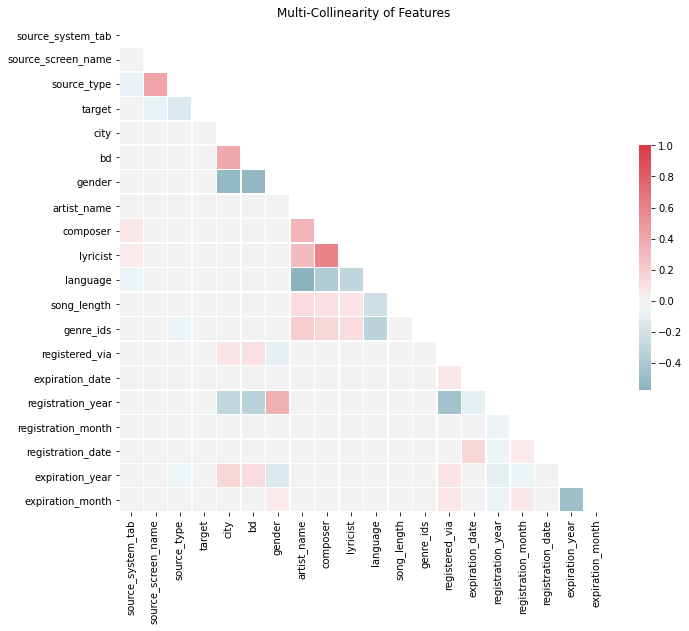

In [16]:
# Creating a mask the size of our covariance matrix
mask = np.zeros_like(correlation, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11,9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220,10,as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation,mask=mask,cmap=cmap,vmax=1,center=0,square=True, 
            linewidth=.5, cbar_kws={'shrink': .5})
ax.set_title('Multi-Collinearity of Features')
plt.savefig('correlation2.png')

In [0]:
train_features['language'].fillna(3,inplace = True)

In [18]:
train_features.isnull().sum()

source_system_tab     0
source_screen_name    0
source_type           0
target                0
city                  0
bd                    0
gender                0
artist_name           0
composer              0
lyricist              0
language              0
song_length           0
genre_ids             0
registered_via        0
expiration_date       0
registration_year     0
registration_month    0
registration_date     0
expiration_year       0
expiration_month      0
dtype: int64

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,y_train,y_test = train_test_split(train_features,train_label,test_size = 0.2)

In [22]:
pip install optuna

     |████████████████████████████████| 204kB 2.8MB/s 
     |████████████████████████████████| 1.1MB 11.9MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 81kB 8.2MB/s 
     |████████████████████████████████| 81kB 7.2MB/s 
     |████████████████████████████████| 112kB 17.2MB/s 
     |████████████████████████████████| 51kB 5.8MB/s 
     |████████████████████████████████| 61kB 6.1MB/s 
  Created wheel for alembic: filename=alembic-1.4.2-cp36-none-any.whl size=159543 sha256=7e7091b20e2bdd35c84b06d9dd083c32fdb94b92ef24e48300e4a89855ec5a68
  Stored in directory: /root/.cache/pip/wheels/1f/04/83/76023f7a4c14688c0b5c2682a96392cfdd3ee4449eaaa287ef
Successfully built alembic
  Created wheel for optuna: filename=optuna-1.5.0-cp36-none-any.whl size=276145 sha256=382aaa76e68736af289feb6fad0d134d104431bb6eea8a8d529a8c07b55f3a74
  Stored in directory: /root/.cache/pip/wheels/38/2

In [0]:
import optuna.integration.lightgbm as lgb

In [0]:
dtrain = lgb.Dataset(X_train, label=y_train)
dval = lgb.Dataset(X_test, label=y_test)

In [0]:
params = {
        "objective": "binary",
        "metric": "binary_logloss",
        "verbosity": -1,
        "boosting_type": "gbdt",
    }

In [26]:
model = lgb.train(
        params, dtrain, valid_sets=[dtrain, dval], verbose_eval=100, early_stopping_rounds=100,
    )

feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds.
[100]	training's binary_logloss: 4.70054e-05	valid_1's binary_logloss: 4.7003e-05
[200]	training's binary_logloss: 7.00568e-09	valid_1's binary_logloss: 7.00505e-09
[300]	training's binary_logloss: 3.15531e-10	valid_1's binary_logloss: 3.15503e-10


feature_fraction, val_score: 0.000000:  14%|#4        | 1/7 [05:51<35:07, 351.18s/it]

Early stopping, best iteration is:
[233]	training's binary_logloss: 3.15531e-10	valid_1's binary_logloss: 3.15503e-10
Training until validation scores don't improve for 100 rounds.
[100]	training's binary_logloss: 0.000563484	valid_1's binary_logloss: 0.000563451
[200]	training's binary_logloss: 2.52639e-06	valid_1's binary_logloss: 2.5265e-06
[300]	training's binary_logloss: 5.11138e-09	valid_1's binary_logloss: 5.11199e-09
[400]	training's binary_logloss: 3.10732e-10	valid_1's binary_logloss: 3.10771e-10


feature_fraction, val_score: 0.000000:  29%|##8       | 2/7 [12:30<30:28, 365.71s/it]

Early stopping, best iteration is:
[348]	training's binary_logloss: 3.10732e-10	valid_1's binary_logloss: 3.10771e-10
Training until validation scores don't improve for 100 rounds.
[100]	training's binary_logloss: 0.00375683	valid_1's binary_logloss: 0.00375685
[200]	training's binary_logloss: 0.000250244	valid_1's binary_logloss: 0.000250281
[300]	training's binary_logloss: 2.76996e-06	valid_1's binary_logloss: 2.77067e-06
[400]	training's binary_logloss: 5.0582e-08	valid_1's binary_logloss: 5.06007e-08
[500]	training's binary_logloss: 1.24857e-09	valid_1's binary_logloss: 1.24908e-09
[600]	training's binary_logloss: 3.0789e-10	valid_1's binary_logloss: 3.08017e-10


feature_fraction, val_score: 0.000000:  43%|####2     | 3/7 [20:41<26:53, 403.27s/it]

Early stopping, best iteration is:
[539]	training's binary_logloss: 3.0789e-10	valid_1's binary_logloss: 3.08017e-10


[I 2020-06-13 14:16:52,325] Finished trial#2 with value: 3.0801703025322515e-10 with parameters: {'feature_fraction': 0.4}. Best is trial#2 with value: 3.0801703025322515e-10.
feature_fraction, val_score: 0.000000:  43%|####2     | 3/7 [20:41<26:53, 403.27s/it]

Training until validation scores don't improve for 100 rounds.
[100]	training's binary_logloss: 0.000229523	valid_1's binary_logloss: 0.00022951
[200]	training's binary_logloss: 4.18343e-07	valid_1's binary_logloss: 4.18328e-07
[300]	training's binary_logloss: 3.44464e-10	valid_1's binary_logloss: 3.44459e-10
[400]	training's binary_logloss: 3.11684e-10	valid_1's binary_logloss: 3.11679e-10


feature_fraction, val_score: 0.000000:  57%|#####7    | 4/7 [26:48<19:36, 392.32s/it]

Early stopping, best iteration is:
[301]	training's binary_logloss: 3.11684e-10	valid_1's binary_logloss: 3.11679e-10
Training until validation scores don't improve for 100 rounds.
[100]	training's binary_logloss: 2.19009e-05	valid_1's binary_logloss: 2.19008e-05
[200]	training's binary_logloss: 9.94286e-10	valid_1's binary_logloss: 9.94284e-10
[300]	training's binary_logloss: 3.30969e-10	valid_1's binary_logloss: 3.30968e-10


feature_fraction, val_score: 0.000000:  71%|#######1  | 5/7 [30:37<11:26, 343.44s/it]

Early stopping, best iteration is:
[211]	training's binary_logloss: 3.30969e-10	valid_1's binary_logloss: 3.30968e-10
Training until validation scores don't improve for 100 rounds.
[100]	training's binary_logloss: 8.49664e-05	valid_1's binary_logloss: 8.49643e-05
[200]	training's binary_logloss: 5.14679e-08	valid_1's binary_logloss: 5.14667e-08
[300]	training's binary_logloss: 3.13502e-10	valid_1's binary_logloss: 3.13493e-10


feature_fraction, val_score: 0.000000:  86%|########5 | 6/7 [36:10<05:40, 340.02s/it]

Early stopping, best iteration is:
[266]	training's binary_logloss: 3.13502e-10	valid_1's binary_logloss: 3.13493e-10
Training until validation scores don't improve for 100 rounds.
[100]	training's binary_logloss: 0.0013833	valid_1's binary_logloss: 0.00138324
[200]	training's binary_logloss: 1.52519e-05	valid_1's binary_logloss: 1.52528e-05
[300]	training's binary_logloss: 8.38295e-08	valid_1's binary_logloss: 8.3844e-08
[400]	training's binary_logloss: 6.23217e-10	valid_1's binary_logloss: 6.23343e-10
[500]	training's binary_logloss: 3.0948e-10	valid_1's binary_logloss: 3.09543e-10


num_leaves, val_score: 0.000000:   0%|          | 0/20 [00:00<?, ?it/s]

Early stopping, best iteration is:
[411]	training's binary_logloss: 3.0948e-10	valid_1's binary_logloss: 3.09543e-10
Training until validation scores don't improve for 100 rounds.
[100]	training's binary_logloss: 0.00377018	valid_1's binary_logloss: 0.00377008
[200]	training's binary_logloss: 0.000251519	valid_1's binary_logloss: 0.000251532
[300]	training's binary_logloss: 2.78653e-06	valid_1's binary_logloss: 2.78679e-06
[400]	training's binary_logloss: 5.092e-08	valid_1's binary_logloss: 5.09272e-08
[500]	training's binary_logloss: 1.25718e-09	valid_1's binary_logloss: 1.25737e-09
[600]	training's binary_logloss: 3.10011e-10	valid_1's binary_logloss: 3.10057e-10


num_leaves, val_score: 0.000000:   5%|5         | 1/20 [07:39<2:25:35, 459.76s/it]

Early stopping, best iteration is:
[539]	training's binary_logloss: 3.10011e-10	valid_1's binary_logloss: 3.10057e-10
Training until validation scores don't improve for 100 rounds.


KeyboardInterrupt: ignored

In [27]:
 best_params = model.params

NameError: ignored